In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def diffusion(data,input,D):
    new_data=data
    size=input["size"]
    dx=input["dx"]
    dt=input["dt"]
    new_data[0]=data[0]+D*dt/dx**2*(data[1]-data[0])
    new_data[size-1]=data[size-1]+D*dt/dx**2*(data[size-2]-data[size-1])
    for i in range(1,len(data)-1):
        new_data[i]=data[i]+D*dt/dx**2*(data[i+1]-2*data[i]+data[i-1])
    return new_data

In [82]:
def react(cell,Amp,input):
    new_cell=cell
    new_Amp=Amp
    growth=input["growth"]
    death=input["death"]
    decrease=input["decrease"]
    for i in range(len(cell)):
        new_cell[i]=cell[i]*(1+growth)-death*Amp[i]
        new_Amp[i]=Amp[i]-decrease*cell[i]
        if new_cell[i]<0:
            new_cell[i]=0
        if new_Amp[i]<0:
            new_Amp[i]=0
    return new_cell, new_Amp


In [242]:
input={
    "size": 1000,
    "dx":1,
    "dt":1,
    "growth": 0,
    "death": 0.1,
    "decrease": 0.1
}

size=input["size"]
cell=np.ones(size)

Amp=np.zeros(size)
Amp[size//2-1]=1
Amp[size//2+1]=1
Amp[size//2]=1

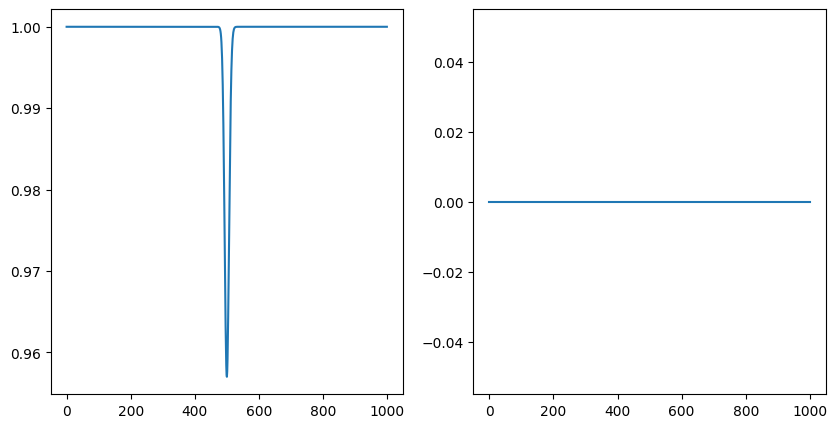

In [243]:
for i in range(100):
    for j in range(10):
        Amp=diffusion(Amp,input,0.1)
    for z in range(2):
        cell=diffusion(cell,input,0.1)
    cell, Amp=react(cell,Amp,input)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(cell)
plt.subplot(122)
plt.plot(Amp)
plt.show()
